Libraries and Load Data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/electronics_product.csv')  # Replace with your file path
df.head()


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4,965,"₹10,999","₹18,999"
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"1,13,956","₹18,999","₹19,999"
2,2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"1,13,956","₹18,999","₹19,999"


**Data Cleaning and Preprocessing**

In [ ]:
# checking data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      9600 non-null   int64 
 1   name            9600 non-null   object
 2   main_category   9600 non-null   object
 3   sub_category    9600 non-null   object
 4   image           9600 non-null   object
 5   link            9600 non-null   object
 6   ratings         9505 non-null   object
 7   no_of_ratings   9505 non-null   object
 8   discount_price  9116 non-null   object
 9   actual_price    9530 non-null   object
dtypes: int64(1), object(9)
memory usage: 750.1+ KB


In [ ]:
# Checking missing values
df.dropna(inplace=True)

# Converting price columns to numerical by removing non-numeric characters
df['discount_price'] = df['discount_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9026 non-null   int64  
 1   name            9026 non-null   object 
 2   main_category   9026 non-null   object 
 3   sub_category    9026 non-null   object 
 4   image           9026 non-null   object 
 5   link            9026 non-null   object 
 6   ratings         9026 non-null   object 
 7   no_of_ratings   9026 non-null   object 
 8   discount_price  9026 non-null   float64
 9   actual_price    9026 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 775.7+ KB


In [ ]:
# Convert ratings and number of ratings to numeric types
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
#errors=corerce is if values are not converted into numbers then replace into nan.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9026 non-null   int64  
 1   name            9026 non-null   object 
 2   main_category   9026 non-null   object 
 3   sub_category    9026 non-null   object 
 4   image           9026 non-null   object 
 5   link            9026 non-null   object 
 6   ratings         9002 non-null   float64
 7   no_of_ratings   4323 non-null   float64
 8   discount_price  9026 non-null   float64
 9   actual_price    9026 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 775.7+ KB


In [ ]:
"""# Fill NaN values with mean for 'ratings' and 'no_of_ratings'
df['ratings'].fillna(df['ratings'].mean(), inplace=True)
df['no_of_ratings'].fillna(df['no_of_ratings'].mean(), inplace=True)

df.info()  # Confirm changes"""

# Convert ratings and number of ratings to numeric types
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

# Fill missing values with the mean of the respective columns
df['ratings'] = df['ratings'].fillna(df['ratings'].mean())
df['no_of_ratings'] = df['no_of_ratings'].fillna(df['no_of_ratings'].mean())

# Check the DataFrame info again to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9026 entries, 0 to 9599
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9026 non-null   int64  
 1   name                   9026 non-null   object 
 2   main_category          9026 non-null   object 
 3   sub_category           9026 non-null   object 
 4   image                  9026 non-null   object 
 5   link                   9026 non-null   object 
 6   ratings                9026 non-null   float64
 7   no_of_ratings          9026 non-null   float64
 8   discount_price         9026 non-null   float64
 9   actual_price           9026 non-null   float64
 10  brand                  9026 non-null   object 
 11  discount_percentage    9026 non-null   float64
 12  main_category_encoded  9026 non-null   int64  
 13  sub_category_encoded   9026 non-null   int64  
 14  brand_encoded          9026 non-null   int64  
 15  cluster  

**Feature Engineering**

In [ ]:
# Extract brand names as a new column (assuming brand is the first word in 'name')
df['brand'] = df['name'].apply(lambda x: x.split()[0])

# Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Preview the new columns
df[['name', 'brand', 'discount_percentage']]

,name,brand,discount_percentage
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...",Redmi,20.714738
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...",OnePlus,-47.843515
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,OnePlus,51.117971
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",Samsung,10.028503
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",OnePlus,-47.843515
...,...,...,...
9595,PALAY® BTS Backpack For Boys Kpop BTS Bangtan ...,PALAY®,32.178041
9596,MOCA iPad Air 5th Generation Case 2022 / iPad ...,MOCA,-12.077290
9597,ZEBRONICS Zeb-Sound Bomb 5 TWS V5.0 Bluetooth ...,ZEBRONICS,-156.382974
9598,LINQS® Original NXP Chip | Waterproof NFC Tag ...,LINQS®,12.787445


In [ ]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,discount_percentage
0,0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965.000000,10999.0,18999.0,Redmi,42.107479
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,302.450844,18999.0,19999.0,OnePlus,5.000250
2,2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,302.450844,1999.0,2299.0,OnePlus,13.049152
3,3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,302.450844,15999.0,24999.0,Samsung,36.001440
4,4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,302.450844,18999.0,19999.0,OnePlus,5.000250


**Data Encoding and Scaling**

In [ ]:
# Label encode categorical columns (e.g., 'main_category' and 'sub_category')
label_encoder = LabelEncoder()
df['main_category_encoded'] = label_encoder.fit_transform(df['main_category'])
df['sub_category_encoded'] = label_encoder.fit_transform(df['sub_category'])
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['discount_price', 'actual_price', 'ratings', 'no_of_ratings', 'discount_percentage']] = scaler.fit_transform(
    df[['discount_price', 'actual_price', 'ratings', 'no_of_ratings', 'discount_percentage']]
)

df.head()


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,discount_percentage,main_category_encoded,sub_category_encoded,brand_encoded
0,0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,-0.185790,3.404818e+00,0.903331,1.139343,Redmi,-0.478230,0,0,1156
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,0.603489,-2.921164e-16,1.805529,1.221243,OnePlus,-2.183326,0,0,1004
2,2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,0.340396,-2.921164e-16,-0.111641,-0.228389,OnePlus,-1.813475,0,0,1004
3,3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,0.077303,-2.921164e-16,1.467205,1.630744,Samsung,-0.758806,0,0,1259
4,4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,0.603489,-2.921164e-16,1.805529,1.221243,OnePlus,-2.183326,0,0,1004


**Clustering for Product Segmentation**

In [ ]:
# Select features for clustering
features = df[['discount_price', 'ratings', 'no_of_ratings', 'discount_percentage']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

df


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,discount_percentage,main_category_encoded,sub_category_encoded,brand_encoded,cluster
0,0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,-0.185790,3.404818e+00,0.903331,1.139343,Redmi,-0.478230,0,0,1156,0
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,0.603489,-2.921164e-16,1.805529,1.221243,OnePlus,-2.183326,0,0,1004,3
2,2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,0.340396,-2.921164e-16,-0.111641,-0.228389,OnePlus,-1.813475,0,0,1004,3
3,3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,0.077303,-2.921164e-16,1.467205,1.630744,Samsung,-0.758806,0,0,1259,3
4,4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,0.603489,-2.921164e-16,1.805529,1.221243,OnePlus,-2.183326,0,0,1004,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,9595,PALAY® BTS Backpack For Boys Kpop BTS Bangtan ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51WpV43F1M...,https://www.amazon.in/PALAY%C2%AE-Backpack-Ban...,0.077303,-1.364143e+00,-0.144233,-0.212665,PALAY®,-0.972410,0,0,1026,3
9596,9596,MOCA iPad Air 5th Generation Case 2022 / iPad ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/31lmoZ3XWQ...,https://www.amazon.in/MOCA-Protective-Generati...,0.340396,-2.921164e-16,-0.283510,-0.252959,MOCA,1.090091,0,0,846,1
9597,9597,ZEBRONICS Zeb-Sound Bomb 5 TWS V5.0 Bluetooth ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61O7fCXFip...,https://www.amazon.in/Zebronics-Zeb-Sound-Blue...,-1.501255,-2.921164e-16,-0.228589,-0.089159,ZEBRONICS,1.076575,0,0,1633,4
9598,9598,LINQS® Original NXP Chip | Waterproof NFC Tag ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71Sg1Qsf+4...,https://www.amazon.in/LINQS-Sticker-Smartrac-C...,-1.238162,-4.751018e-01,-0.291968,-0.334778,LINQS®,0.343941,0,0,772,4


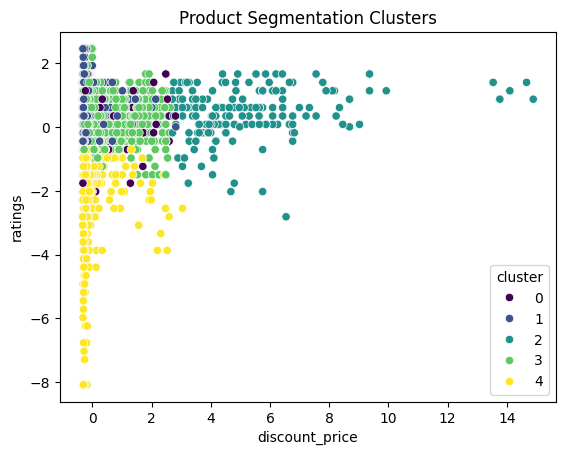

In [ ]:
# Visualize clusters
sns.scatterplot(data=df, x='discount_price', y='ratings', hue='cluster', palette='viridis')
plt.title('Product Segmentation Clusters')
plt.show()

**Build the Prediction Model**

In [ ]:
# Define target variable for customer interest (high or low based on ratings threshold)
df['interest'] = np.where(df['ratings'] >= 4, 1, 0)  # 1 for high interest, 0 for low interest

# Define features and target
X = df[['discount_price', 'actual_price', 'no_of_ratings', 'discount_percentage', 'main_category_encoded', 'sub_category_encoded', 'brand_encoded']]
y = df['interest']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806

    accuracy                           1.00      1806
   macro avg       1.00      1.00      1.00      1806
weighted avg       1.00      1.00      1.00      1806

Accuracy Score: 1.0


**Recommendations Based on Clusters**

In [ ]:
# Check if the product exists in the dataset without interpreting as regex
print(df[df['name'].str.contains("boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)", case=False, regex=False)])


    Unnamed: 0                                               name  \
15          15  boAt BassHeads 100 in-Ear Wired Headphones wit...   

          main_category     sub_category  \
15  tv, audio & cameras  All Electronics   

                                                image  \
15  https://m.media-amazon.com/images/I/719elVA3Fv...   

                                                 link   ratings  \
15  https://www.amazon.in/boAt-BassHeads-100-Headp...  0.077303   

    no_of_ratings  discount_price  actual_price brand  discount_percentage  \
15  -2.921164e-16       -0.292081      -0.33486  boAt               0.3467   

    main_category_encoded  sub_category_encoded  brand_encoded  cluster  \
15                      0                     0           1675        1   

    interest  
15         0  


In [ ]:
def recommend_products(product_name, df):
    cluster_id = df[df['name'] == product_name]['cluster'].values[0]
    recommendations = df[df['cluster'] == cluster_id].sample(5)
    return recommendations[['name', 'ratings', 'discount_price', 'link']]

# Example: Recommend products similar to "boAt Wave Call Smart Watch, Smart Talk with Advanced Dedicated Bluetooth Calling Chip, 1.69 HD Display with 550 NITS & 70%..."
recommend_products("boAt Wave Call Smart Watch, Smart Talk with Advanced Dedicated Bluetooth Calling Chip, 1.69 HD Display with 550 NITS & 70%...", df)


,name,ratings,discount_price,link
3609,(Renewed) boAt Rockerz 255 Pro+ in-Ear Earphon...,-0.975069,-0.201861,https://www.amazon.in/boAt-Rockerz-255-Pro-Ear...
44,ZEBRONICS Zeb-Bro in Ear Wired Earphones with ...,-1.501255,-0.320275,https://www.amazon.in/Zebronics-Zeb-Bro-Wired-...
7304,Vemigon Compatible with Apple Watch Straps wit...,-0.975069,-0.266256,https://www.amazon.in/Vemigon-Compatible-Shock...
3149,Zebronics Zeb Smart Cam 100 Smart Home Automat...,-1.238162,-0.168029,https://www.amazon.in/Zeb-Smart-Cam-100-Smartp...
5846,Oraimo Palm Wireless Bluetooth Speaker Portabl...,-0.711976,-0.258249,https://www.amazon.in/Oraimo-Wireless-Bluetoot...
